In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.assignment4 as im

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

y = plt.imread('assets/leopard.png')

# 1 Bilateral Filter

## Question 1

In [3]:
x = plt.imread('assets/castle.png')
sig = 10 / 255
y   = x + sig * np.random.randn(*x.shape)

In [4]:
np.maximum([1,-4,3],0)

array([1, 0, 3])

## Question 2 and 3

In [5]:
def kernel_func(alpha,C, h, sig):
    num = -np.maximum((alpha-2*h*sig**2),0)*(C**0.5)
    den = (2**1.5)*h*sig**2
    expon = np.exp(num/den)
    return expon

In [6]:
def bilateral_naive(y, sig, s1=2, s2=2, h=1):
    n1, n2 = y.shape[:2]
    c = y.shape[2] if y.ndim == 3 else 1
    x = np.zeros(y.shape)
    Z = np.zeros((n1, n2, *[1] * (y.ndim - 2)))
    for i in range(s1, n1-s1):
        for j in range(s2, n2-s2):
            for k in range(-s1, s1 + 1):
                for l in range(-s2, s2 + 1):
                    dist2 = ((y[i + k, j + l] - y[i, j])**2).mean()
                    # complete
                    alpha =dist2
                
                    kern_alph = ((kernel_func(alpha,c,h,sig)))
                    
                    
                    r0 = (kern_alph*y[i + k, j + l])
                    
                    x[i,j,...] += (r0)  
                    Z[i,j,...] += (kern_alph) 
    Z[Z == 0] = 1
    x = x / Z
    return x

In [9]:
t1 = time.time()
naive_filt = bilateral_naive(y,sig,s1 =2, s2=2, h=1)
t2 = time.time()
tn =t2-t1
print(" Bilateral naive takes {:.2f} s ".format(tn))

 Bilateral naive takes 145.87 s 


## Question 4

In [7]:
def bilateral(y, sig, s1=10, s2=10, h=1, boundary='mirror'):
    n1, n2 = y.shape[:2]
    c = y.shape[2] if y.ndim == 3 else 1
    x = np.zeros(y.shape)
    Z = np.zeros((n1, n2, *[1] * (y.ndim - 2)))
    
    for k in range(-s1, s1 + 1):
        for l in range(-s2, s2 + 1):
            y_shift = im.shift(y,-k,-l,boundary)
            dist2 = np.mean(((y_shift - y)**2),axis =-1)
            # complete
            alpha =dist2

            kern_alph = ((kernel_func(alpha,c,h,sig)))
            r0 = (y_shift.transpose()*kern_alph.transpose()).transpose()
            #r0 = (kern_alph*y_shift)
            kern_alph = kern_alph.reshape(Z.shape)
            x += (r0)  
            Z += (kern_alph) 
    
    Z[Z == 0] = 1
    x = x / Z
    return x


## Question 5

In [165]:
x = plt.imread('assets/castle.png')
sig = 10 / 255
y   = x + sig * np.random.randn(*x.shape)

t1 = time.time()
bil_filt = bilateral(y,sig,s1 =7, s2=7, h=1,boundary = 'mirror')
t2 = time.time()
tn =t2-t1
print(" Bilateral takes {:.2f} s ".format(tn))

 Bilateral takes 4.13 s 


<IPython.core.display.Javascript object>


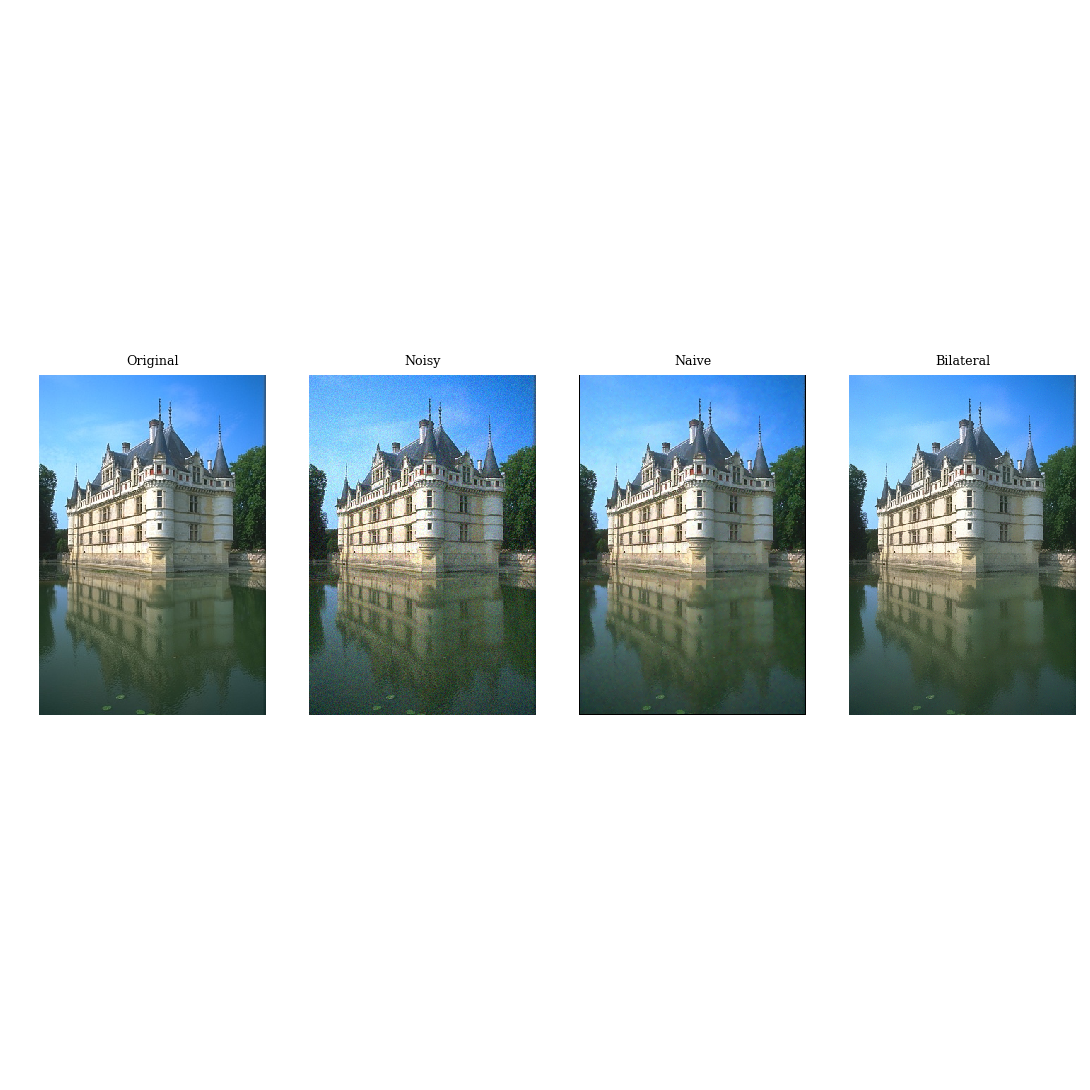

In [166]:

fig, axes = plt.subplots(ncols=4, figsize=(10, 10))

im0.show(x, ax=axes[0])
axes[0].set_title('Original')
im0.show(y, ax=axes[1])
axes[1].set_title('Noisy')
im0.show(naive_filt, ax=axes[2])
axes[2].set_title('Naive')
im0.show(bil_filt, ax=axes[3])
axes[3].set_title('Bilateral')
fig.show()

## Question 6
The function is slower with s1=s2=7 but the filtered output appears superior.
If the noise is 10 times greater then the bilateral filter appears to blur the image and does not do much to reduce the noise


 Bilateral takes 0.44 s 


<IPython.core.display.Javascript object>


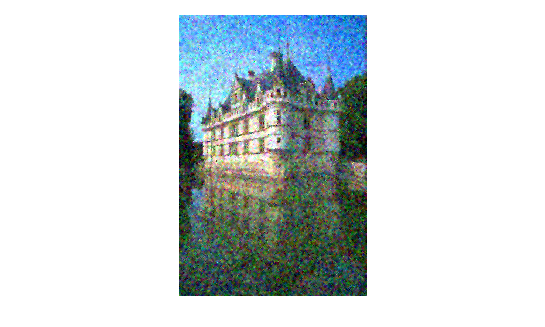

In [167]:
x = plt.imread('assets/castle.png')
sig = 100 / 255
y   = x + sig * np.random.randn(*x.shape)

t1 = time.time()
bil_filt = bilateral(y,sig,s1 =2, s2=2, h=1,boundary = 'mirror')
t2 = time.time()
tn =t2-t1
print(" Bilateral takes {:.2f} s ".format(tn))
im0.show(bil_filt)

# 2 NL-means Filter
## Question 7

In [14]:
def kernel_func2(alpha,C, h, sig,P):
    num = -np.maximum((alpha-2*h*sig**2),0)*((C*P)**0.5)
    den = (2**1.5)*h*sig**2
    expon = np.exp(num/den)
    return expon

def nlmeans_naive(y, sig, s1=2, s2=2, p1=1, p2=1, h=1):
    n1, n2 = y.shape[:2]
    c = y.shape[2] if y.ndim == 3 else 1
    x = np.zeros(y.shape)
    Z = np.zeros((n1, n2, *[1] * (y.ndim - 2)))
    P = (2*p1+1)*(2*p2+1)
    for i in range(s1, n1-s1-p1):
        for j in range(s2, n2-s2-p2):
            for k in range(-s1, s1 + 1):
                for l in range(-s2, s2 + 1):
                    dist2 = 0
                    for u in range(-p1, p1 + 1):
                        for v in range(-p2, p2 + 1):
                            # complete
                            dist2 += ((y[i + k+u, j + l+v] - y[i, j])**2).mean()
                    # complete
                    alpha =dist2/P
                
                    kern_alph = ((kernel_func2(alpha,c,h,sig,P)))
                    
                    
                    r0 = (kern_alph*y[i + k, j + l])
                    
                    x[i,j,...] += (r0)  
                    Z[i,j,...] += (kern_alph) 
    Z[Z == 0] = 1
    x = x / Z
    return x
                                

## Question 8

In [123]:
t1 = time.time()
naive_nl = nlmeans_naive(y,sig,s1 =2, s2=2, p1 =1, p2 =1, h=1)
t2 = time.time()
tn =t2-t1
print(" Nl means naive takes {:.2f} s ".format(tn))

 Nl means naive takes 592.04 s 


## Question 9
The patch size is the size of the box kernel used in convolution given by $(2p_1+1)*(2p_2+1)$

In [98]:
def nlmeans(y, sig, s1=7, s2=7, p1=None, p2=None, h=1, boundary='mirror'):
    p1 = (1 if y.ndim == 3 else 2) if p1 is None else p1
    p2 = (1 if y.ndim == 3 else 2) if p2 is None else p2
    n1, n2 = y.shape[:2]
    c = y.shape[2] if y.ndim == 3 else 1
    x = np.zeros(y.shape)
    Z = np.zeros((n1, n2, *[1] * (y.ndim - 2)))
    P = (2*p1+1)*(2*p2+1)
    
    
    for k in range(-s1,s1+1):
        for l in range(-s2,s2+1):


                y_shift = im.shift(y,-k,-l,boundary)
                y_diff = y_shift -y
                
                y_norm = np.mean((((y_diff))**2),axis=-1)
                
                box = im.kernel('box', p1)
                #convolve with an appropriate box function
                y_conv = im.convolve(y_norm, box, boundary, separable=None)
                # complete
                alpha =y_conv
                
                kern_alph = ((kernel_func2(alpha,c,h,sig,P)))
                r0 = (y_shift.transpose()*kern_alph.transpose()).transpose()
                #r0 = (kern_alph*y_shift)
                kern_alph = kern_alph.reshape(Z.shape)
                x += (r0)  
                Z += (kern_alph) 
            
    Z[Z == 0] = 1
    x = x / Z
    return x
                  

## Question 10 and 11

The implementation is 10 times faster and the complextity of the operation is $O((2s_1)^2)$ while that of the naive convolution is $O((n^2)(2s_1)^2(2p_1)^2)$

In [168]:
x = plt.imread('assets/leopard.png')
sig = 20 / 255
y   = x + sig * np.random.randn(*x.shape)

t1 = time.time()
nl_means = nlmeans(y,sig,s1 =2, s2=2, p1 =1, p2 =1, h=1)
t2 = time.time()
tnnl =t2-t1
print(" Nl means  takes {:.2f} s ".format(tnnl))


 Nl means  takes 0.82 s 


In [169]:
x = plt.imread('assets/leopard.png')
sig = 20 / 255
y   = x + sig * np.random.randn(*x.shape)

t1 = time.time()
nl_means = nlmeans(y,sig,s1 =7, s2=7, p1 =1, p2 =1, h=1)
t2 = time.time()
tnnl =t2-t1
print(" Nl means  takes {:.2f} s ".format(tnnl))

t1 = time.time()
bil_filt = bilateral(y,sig,s1 =7, s2=7, h=1,boundary = 'mirror')
t2 = time.time()
tb =t2-t1

print(" Bilateral takes {:.2f} s ".format(tb))

 Nl means  takes 7.30 s 
 Bilateral takes 4.60 s 


## Question 12

In [146]:
def psnr(x,x0):
    diff =np.linalg.norm(x-x0)
    R = np.ptp(x)
    n = np.prod(x.shape)
    psn = 10*np.log10(R**2*n/(diff)**2)
    return psn

## Question 13

<IPython.core.display.Javascript object>


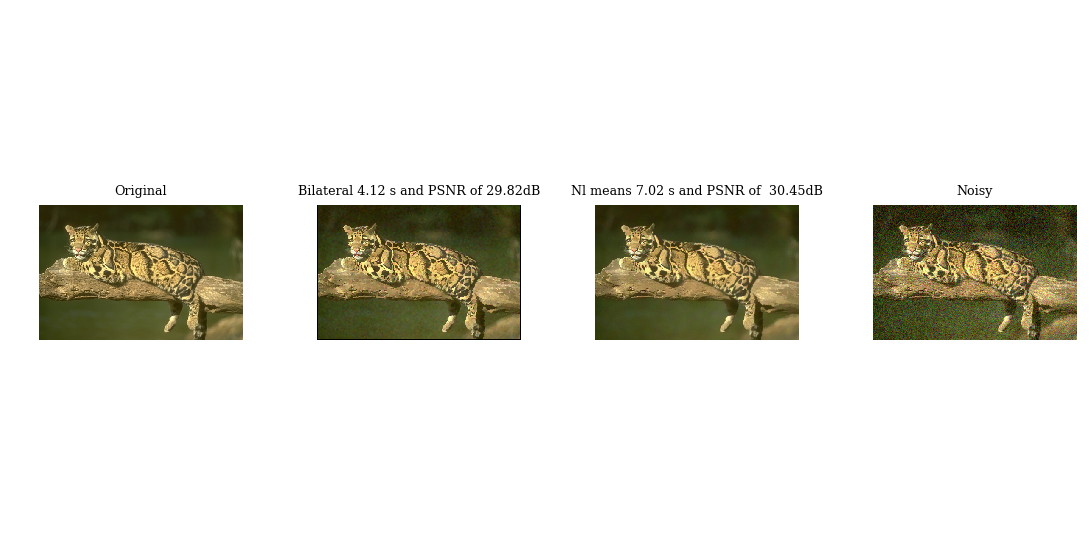

In [147]:
psnr_nl = psnr(x,nl_means)
psnr_bl = psnr(x,bil_filt)

import imagetools as im0
fig, axes = plt.subplots(ncols=4, figsize=(10, 5))
im0.show(x, ax=axes[0])
axes[0].set_title('Original')
im0.show(naive_nl, ax=axes[1])
axes[1].set_title('Bilateral {:.2f} s and PSNR of {:.2f}dB'.format(tb,psnr_bl))
im0.show(nl_means, ax=axes[2])
axes[2].set_title('Nl means {:.2f} s and PSNR of  {:.2f}dB'.format(tnnl,psnr_nl))
im0.show(y, ax=axes[3])
axes[3].set_title('Noisy')
fig.show()

## Question 14
The psnr drops upon increasing or decreasing h, h =1 seems to be a local maximum. PSNR drops as the noise is increased.

In [186]:
x = plt.imread('assets/leopard.png')
sig = 160 / 255
y   = x + sig * np.random.randn(*x.shape)

t1 = time.time()
nl_means = nlmeans(y,sig,s1 =7, s2=7, p1 =1, p2 =1, h=2)
t2 = time.time()
tnnl =t2-t1
print(" Nl means  takes {:.2f} s ".format(tnnl))

 Nl means  takes 6.99 s 


In [187]:
psnr_nl = psnr(x,nl_means)
print(psnr_nl)

20.239969174310282
